# M2.3 Individual NN Classification Assignment (Fall '22)
**Dr. Dave Wanik - University of Connecticut**

* Full Name: Prashant Ashok Gaikwad
* Student ID (7 digit number): 2994408

---------------------------------------------------------------------------

Each student must complete and submit their own file, but you may work with your group for help. I do not want to see direct copy and pasted code otherwise you will get a zero.

1. Read the data dictionary and description from here: 

* https://oehha.ca.gov/media/downloads/calenviroscreen/document/calenviroscreen40resultsdatadictionaryf2021.zip

 Download the data using gdown, read the Excel file using pandas, print the first 10 rows using df.head() and use df.info() to examine the data types and missing values.

2. Simplify the raw dataframe so that you only keep the columns you need. The `X` variable will be the following columns: `Population`, `Ozone` through `Solid Waste Pctl`, and `Asthma` through `Linguistic Isolation Pctl`. The `y` variable will be `Poverty`. Examine the quality of each column and use your judgement about dropping rows or imputing missing values. Add text cells and lots of comments so we can understand your logic/justification!

3. Recode the target variable to a 1 if greater than the median value of poverty, otherwise make it a 0. Use this recoded variable as the target variable! Now it is a classification problem.

4. Make two interesting plots or tables and a description of why you made the table and what you see.

5. Do an 90/10 split for X_train, X_test, y_train, y_test where the random seed is equal to your 7 digit studentID number.

6. Use the StandardScaler() on train and apply to test partition. Do not scale the target variable!

7. Build a model using the Sequential API (like we do in class) with at least 2 dense layers with the relu activation function, and with dropout in between each dense layer (use a number between 0.1 and 0.5). Compile the model using an appropriate optimizer. Use early stopping with patience of at least 10 and restore the best weights once the model converges. You can choose whatever batch size you would like to.

8. Fit the model for 100000 epochs with a batch size of your choice, using X_test and y_test as the validation data. Don’t forget the early stopping callback! 

9. Evaluate the model using learning curves, error metrics and confusion matrices for each partition (like we do in class). You should largely be able to copy and paste this from class notebooks. Add a few bullet points about what you see (did your model learn nice and gently? What do the scatterplots look like?). If you don't have text cells here, you will lose points.

10. Calculate what a baseline prediction would be for the train and test partitions (a mean only model). Did your model do better than the baseline predictions? If so, you have a useful model! 

# Cumulative Impacts in California communities by census tract 

## Data Preparation

### Read Data and Import Modules

In [ ]:
# import modules
# for general data analysis/plotting
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# for data prep
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# neural net modules
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.callbacks import EarlyStopping

In [ ]:
# https://drive.google.com/file/d/1_8vmQwSZ02ZOMw_IPHY5OWkwpXQLVW2E/view?usp=sharing
!gdown --id 1_8vmQwSZ02ZOMw_IPHY5OWkwpXQLVW2E # ID for Environmental Health data! look up!
df_CalEnviroScreen = pd.read_excel('CalEnviroScreen.xlsx')

/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1_8vmQwSZ02ZOMw_IPHY5OWkwpXQLVW2E
To: /content/CalEnviroScreen.xlsx
100% 6.19M/6.19M [00:00<00:00, 219MB/s]


In [ ]:
# read data
df = pd.read_excel('CalEnviroScreen.xlsx')

In [ ]:
# Printing the first 10 rows
df.head(10)

,Census Tract,Total Population,California County,ZIP,Nearby City \n(to help approximate location only),Longitude,Latitude,CES 3.0 Score,CES 3.0 Percentile,CES 3.0 \nPercentile Range,...,Linguistic Isolation Pctl,Poverty,Poverty Pctl,Unemployment,Unemployment Pctl,Housing Burden,Housing Burden Pctl,Pop. Char.,Pop. Char. Score,Pop. Char. Pctl
0,6019001100,3174,Fresno,93706,Fresno,-119.781696,36.709695,94.090246,100.000000,95-100% (highest scores),...,77.509665,76.3,97.121307,17.6,91.724838,26.0,79.398324,92.120494,9.553509,99.697314
1,6071001600,6133,San Bernardino,91761,Ontario,-117.618013,34.057780,90.677839,99.987388,95-100% (highest scores),...,96.253833,72.5,94.632307,12.3,71.823836,34.1,93.754760,87.436849,9.067784,98.108210
2,6019000200,3167,Fresno,93706,Fresno,-119.805504,36.735491,85.970036,99.974776,95-100% (highest scores),...,78.389548,86.8,99.560025,16.1,87.980708,40.1,97.854785,94.581328,9.808714,99.987388
3,6077000801,6692,San Joaquin,95203,Stockton,-121.314524,37.940517,82.491521,99.962164,95-100% (highest scores),...,75.136648,61.3,85.568825,19.6,94.973981,21.1,63.544047,86.701266,8.991499,97.717241
4,6019001500,2206,Fresno,93725,Fresno,-119.717843,36.681600,82.030814,99.949552,95-100% (highest scores),...,73.723504,66.4,90.232558,18.6,93.654017,28.1,83.980706,80.075199,8.304332,92.760752
5,6037204920,2598,Los Angeles,90023,Los Angeles,-118.197497,34.017500,80.726872,99.936940,95-100% (highest scores),...,89.148114,66.4,90.232558,11.6,67.419723,22.0,67.034780,82.361214,8.541407,94.892168
6,6077000300,2396,San Joaquin,95203,Stockton,-121.302072,37.952421,80.178935,99.924328,95-100% (highest scores),...,92.401013,76.2,97.033312,14.4,82.002792,24.3,74.727088,91.940147,9.534806,99.646866
7,6019001000,4106,Fresno,93706,Fresno,-119.804314,36.697751,80.134819,99.911716,95-100% (highest scores),...,76.576456,74.5,95.901948,20.0,95.494352,31.8,90.720995,93.793697,9.727032,99.911716
8,6037206050,2146,Los Angeles,90023,Los Angeles,-118.224453,34.029904,79.025293,99.899105,95-100% (highest scores),...,97.120384,75.7,96.643620,28.5,99.505013,31.7,90.555979,80.249569,8.322415,92.962543
9,6019000400,6343,Fresno,93721,Fresno,-119.776209,36.727656,78.529850,99.886493,95-100% (highest scores),...,71.350487,83.4,99.082338,23.5,98.273893,23.2,71.337903,83.195409,8.627918,95.711943


### Checking for Missing Values/ Inspecting Data Types

In [ ]:
# Chekcing all columns and properties
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8035 entries, 0 to 8034
Data columns (total 57 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   Census Tract                                      8035 non-null   int64  
 1   Total Population                                  8035 non-null   int64  
 2   California County                                 8035 non-null   object 
 3   ZIP                                               8035 non-null   int64  
 4   Nearby City 
(to help approximate location only)  8035 non-null   object 
 5   Longitude                                         8035 non-null   float64
 6   Latitude                                          8035 non-null   float64
 7   CES 3.0 Score                                     7929 non-null   float64
 8    CES 3.0 Percentile                               7929 non-null   float64
 9   CES 3.0 
Percentile

In [ ]:
# Shape of the Data
df.shape

(8035, 57)

### Subsetting the Data

In [ ]:
# Simplify the raw dataframe so that you only keep the columns you need. 
# The X variable will be the following columns: Population, Ozone through Solid Waste Pctl, and Asthma through Linguistic Isolation Pctl. 
# The y variable will be Poverty. Examine the quality of each column and use your judgement about dropping rows or imputing missing values. 
df1 = df["Total Population"]
df2 = df.loc[:,"Ozone":"Solid Waste Pctl"]
df3 = df.loc[:,"Asthma":"Poverty"]


In [ ]:
# Combining the subsets into one dataframe
df_merged = [df1, df2, df3]
df = pd.concat(df_merged, axis = 1)

In [ ]:
# Printing few rows of the new data fram
df.head()

,Total Population,Ozone,Ozone Pctl,PM2.5,PM2.5 Pctl,Diesel PM,Diesel PM Pctl,Drinking Water,Drinking Water Pctl,Pesticides,...,Asthma Pctl,Low Birth Weight,Low Birth Weight Pctl,Cardiovascular Disease,Cardiovascular Disease Pctl,Education,Education Pctl,Linguistic Isolation,Linguistic Isolation Pctl,Poverty
0,3174,0.064889,98.182950,15.40,97.218064,48.523809,95.544493,681.195604,80.915554,2.749604,...,97.668620,7.44,93.835704,14.13,96.309687,53.3,95.760787,16.2,77.509665,76.3
1,6133,0.062163,91.101431,13.31,93.637725,38.556339,92.121966,904.657603,96.108270,1.365360,...,69.779329,7.04,90.849673,12.94,92.656776,53.3,95.760787,33.4,96.253833,72.5
2,3167,0.062163,91.101431,15.40,97.218064,47.445208,95.420037,681.195604,80.915554,3.025629,...,98.329385,10.16,99.782135,14.96,97.668620,42.3,89.061317,16.7,78.389548,86.8
3,6692,0.046178,53.018046,12.54,84.019461,24.117036,73.515868,278.756235,29.113135,12.926266,...,98.341853,6.23,80.648469,14.72,97.169929,40.8,87.522079,15.3,75.136648,61.3
4,2206,0.064889,98.182950,15.40,97.218064,18.845944,58.220286,1000.240794,98.640389,3518.413336,...,89.539958,4.50,38.920928,12.82,92.357561,45.1,91.130457,14.7,73.723504,66.4


## Data Analysis

In [ ]:
# Distribution of the data in terms of min, max and average
df.describe()

,Total Population,Ozone,Ozone Pctl,PM2.5,PM2.5 Pctl,Diesel PM,Diesel PM Pctl,Drinking Water,Drinking Water Pctl,Pesticides,...,Asthma Pctl,Low Birth Weight,Low Birth Weight Pctl,Cardiovascular Disease,Cardiovascular Disease Pctl,Education,Education Pctl,Linguistic Isolation,Linguistic Isolation Pctl,Poverty
count,8035.000000,8035.000000,8035.000000,8016.000000,8016.000000,8035.000000,8035.000000,8017.000000,8017.000000,8035.000000,...,8035.000000,7813.000000,7813.000000,8035.000000,8035.000000,7939.000000,7939.000000,7793.000000,7793.000000,7956.000000
mean,4636.459988,0.047454,53.298961,10.377904,53.594976,19.196066,50.020674,472.372259,50.344264,313.973576,...,49.934012,4.976329,50.040673,8.265890,49.977830,19.121779,50.051689,10.417862,48.357838,36.386790
std,1972.587602,0.010283,28.602241,2.598074,29.370030,16.993878,28.882180,249.331572,28.828744,2775.125385,...,28.921850,1.551352,28.902252,2.971099,28.917487,15.952094,28.848990,9.982732,29.764977,20.316885
min,0.000000,0.026421,0.236465,1.651081,0.012475,0.021181,0.012446,6.919810,0.012473,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3358.000000,0.040127,25.874300,8.697944,30.701098,8.811598,25.009334,249.345239,25.009355,0.000000,...,24.878444,3.950000,24.977573,6.080000,24.996883,6.300000,25.082009,3.000000,22.516998,19.200000
50%,4413.000000,0.046178,53.018046,10.370000,52.607285,16.447688,50.006223,479.227886,51.016590,0.000000,...,49.931430,4.920000,50.224273,7.940000,49.956365,14.000000,50.000000,7.400000,48.340221,33.500000
75%,5656.500000,0.055122,77.871811,12.050000,81.661677,24.646576,75.003111,664.069078,78.570538,0.370835,...,74.959481,5.930000,75.060874,10.040000,75.065453,28.700000,74.993692,14.900000,74.230103,51.500000
max,37452.000000,0.067829,100.000000,19.600000,100.000000,253.730796,100.000000,1245.651010,100.000000,91316.186050,...,100.000000,14.890000,100.000000,21.260000,100.000000,80.000000,100.000000,72.300000,100.000000,96.200000


### Data Types and Null Values

In [ ]:
# Data frame information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8035 entries, 0 to 8034
Data columns (total 36 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Total Population             8035 non-null   int64  
 1   Ozone                        8035 non-null   float64
 2   Ozone Pctl                   8035 non-null   float64
 3   PM2.5                        8016 non-null   float64
 4   PM2.5 Pctl                   8016 non-null   float64
 5   Diesel PM                    8035 non-null   float64
 6   Diesel PM Pctl               8035 non-null   float64
 7   Drinking Water               8017 non-null   float64
 8   Drinking Water Pctl          8017 non-null   float64
 9   Pesticides                   8035 non-null   float64
 10  Pesticides Pctl              8035 non-null   float64
 11  Tox. Release                 8035 non-null   float64
 12  Tox. Release Pctl            8035 non-null   float64
 13  Traffic           

We have large number of rows (minimum = 7793) so we can go ahead and drop the rows with null values.

In [ ]:
# Dropping the rows with null values
df.dropna(inplace=True)

In [ ]:
# Looking at the dataframe column information
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7610 entries, 0 to 7928
Data columns (total 36 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Total Population             7610 non-null   int64  
 1   Ozone                        7610 non-null   float64
 2   Ozone Pctl                   7610 non-null   float64
 3   PM2.5                        7610 non-null   float64
 4   PM2.5 Pctl                   7610 non-null   float64
 5   Diesel PM                    7610 non-null   float64
 6   Diesel PM Pctl               7610 non-null   float64
 7   Drinking Water               7610 non-null   float64
 8   Drinking Water Pctl          7610 non-null   float64
 9   Pesticides                   7610 non-null   float64
 10  Pesticides Pctl              7610 non-null   float64
 11  Tox. Release                 7610 non-null   float64
 12  Tox. Release Pctl            7610 non-null   float64
 13  Traffic           

We have 7610 rows for predictions and we can proceed for further analysis.

In [ ]:
# Distribution of the data in terms of min, max and average
df.describe()

,Total Population,Ozone,Ozone Pctl,PM2.5,PM2.5 Pctl,Diesel PM,Diesel PM Pctl,Drinking Water,Drinking Water Pctl,Pesticides,...,Asthma Pctl,Low Birth Weight,Low Birth Weight Pctl,Cardiovascular Disease,Cardiovascular Disease Pctl,Education,Education Pctl,Linguistic Isolation,Linguistic Isolation Pctl,Poverty
count,7610.000000,7610.000000,7610.000000,7610.000000,7610.000000,7610.000000,7610.000000,7610.000000,7610.000000,7610.000000,...,7610.000000,7610.000000,7610.000000,7610.000000,7610.000000,7610.000000,7610.000000,7610.000000,7610.000000,7610.000000
mean,4737.839028,0.047437,53.297464,10.429453,54.218154,19.407068,50.791578,473.892897,50.530058,319.822251,...,50.585492,4.979961,50.137344,8.320455,50.504137,19.263903,50.316906,10.527188,48.851004,36.424310
std,1909.514639,0.010260,28.537815,2.561925,29.104091,16.549297,28.456995,249.918160,28.886604,2827.490475,...,28.671933,1.540476,28.840131,2.928880,28.695813,16.012508,28.833129,9.966289,29.652028,20.302522
min,797.000000,0.026421,0.236465,1.651081,0.012475,0.021181,0.012446,6.919810,0.012473,0.000000,...,0.024935,0.000000,0.000000,1.560000,0.074804,0.000000,0.000000,0.000000,0.000000,1.000000
25%,3454.000000,0.040127,25.874300,8.697944,30.701098,9.210939,26.375233,249.998614,25.124735,0.000000,...,25.885176,3.960000,25.144175,6.150000,25.732452,6.400000,25.485743,3.100000,23.276896,19.200000
50%,4475.500000,0.046178,53.018046,10.370000,52.607285,16.790000,51.064095,479.227886,51.016590,0.000000,...,50.760504,4.920000,50.224273,8.010000,50.704401,14.200000,50.353268,7.550000,49.080123,33.600000
75%,5700.750000,0.055122,77.871811,12.050000,81.661677,24.746088,75.255134,664.069078,78.570538,0.332683,...,75.286747,5.930000,75.060874,10.080000,75.414537,28.900000,75.321726,15.000000,74.470071,51.700000
max,37452.000000,0.067829,100.000000,19.600000,100.000000,208.400000,99.987554,1245.651010,100.000000,91316.186050,...,99.975065,13.380000,99.987184,21.260000,100.000000,80.000000,100.000000,72.300000,100.000000,94.900000


### Correlation

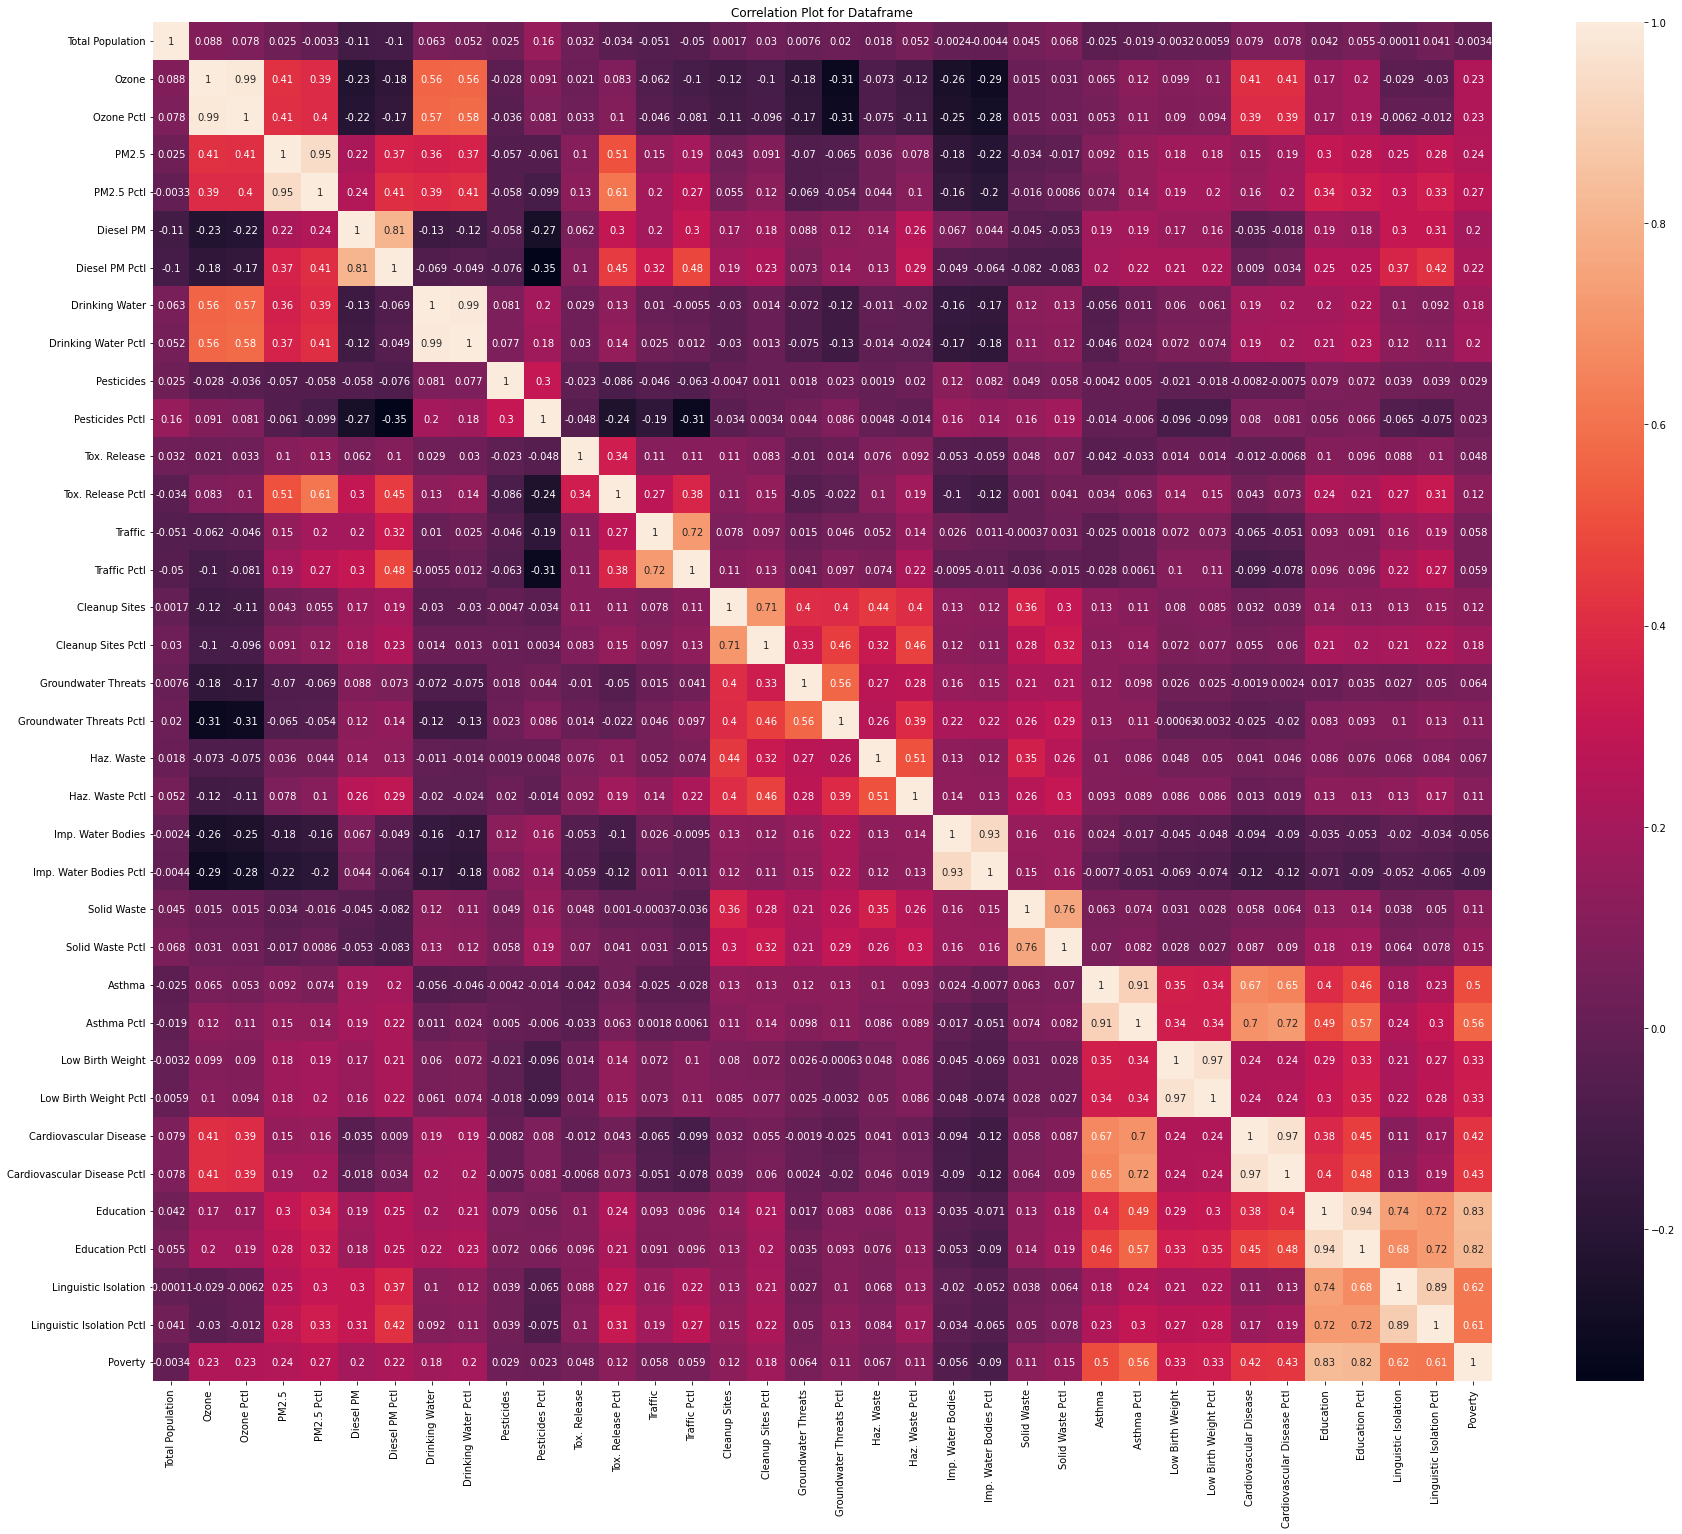

In [ ]:
# Lets understand the correlation between the variables under consideration

plt.figure(figsize=(30,25)) #Configuring plot size
plt.title("Correlation Plot for Dataframe")
sns.heatmap(df.corr(),annot=True) #Heatmap for correlation co-efficients 

We can observe that not all parameters are correlated with the prediction variable Poverty. Some of them are very less correlated with the prediction variable. 

We can remove the columns that have very less correlation coefficient. Currently, we will remove the ones having correlation coefficient between -0.15 and 0.15.



In [ ]:
# Dropping the least correlated columns
df = df.drop(['Total Population','Pesticides','Pesticides Pctl','Tox. Release','Tox. Release Pctl','Traffic','Traffic Pctl', 'Groundwater Threats',
              'Groundwater Threats Pctl', 'Haz. Waste','Haz. Waste Pctl','Cleanup Sites','Imp. Water Bodies','Imp. Water Bodies Pctl','Solid Waste','Solid Waste Pctl','Linguistic Isolation'], axis=1)

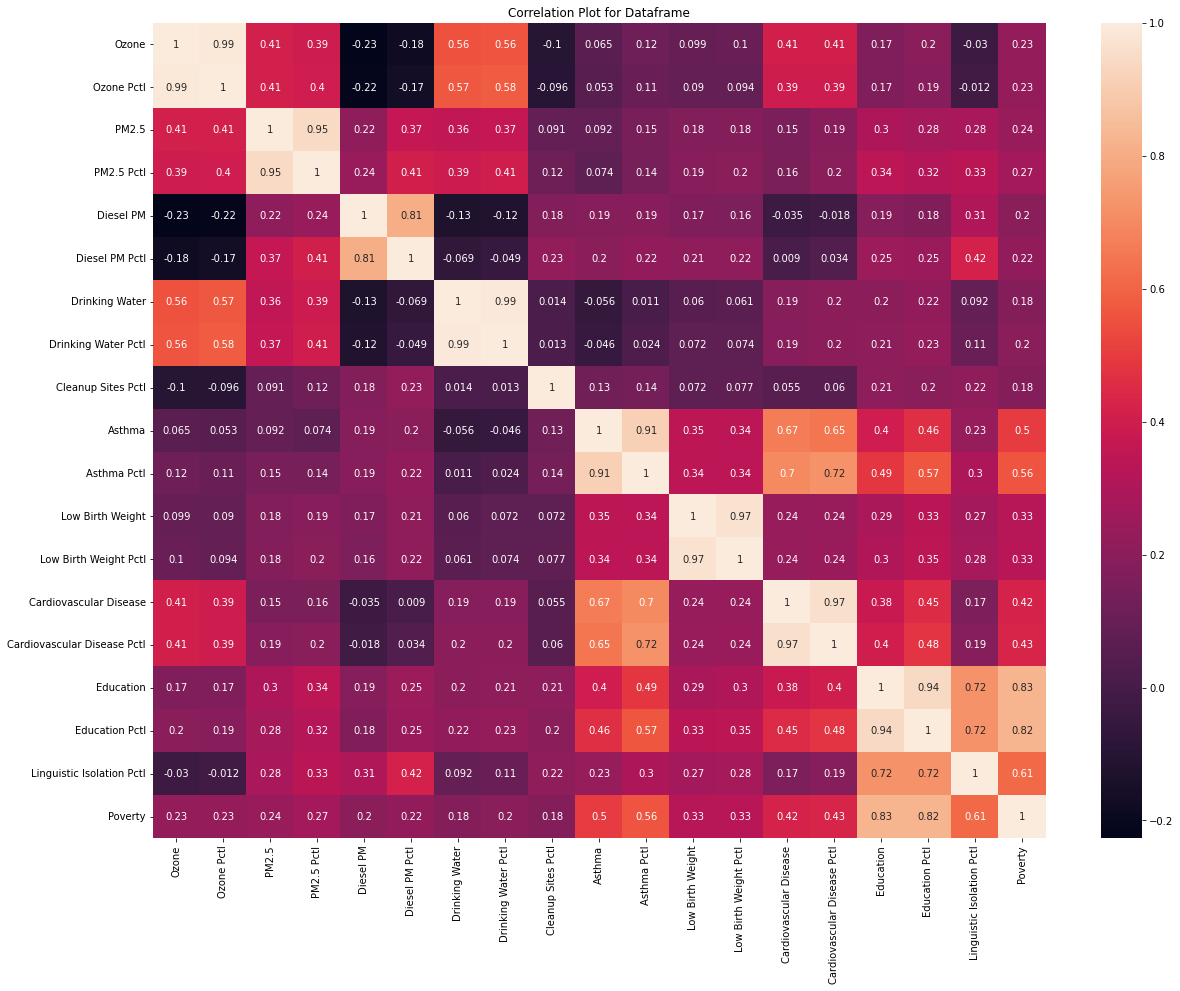

In [ ]:
# Lets understand the correlation between the variables under consideration

plt.figure(figsize=(20,15)) #Configuring plot size
plt.title("Correlation Plot for Dataframe")
sns.heatmap(df.corr(),annot=True) #Heatmap for correlation co-efficients 

In [ ]:
df.shape

(7610, 19)

### Distribution

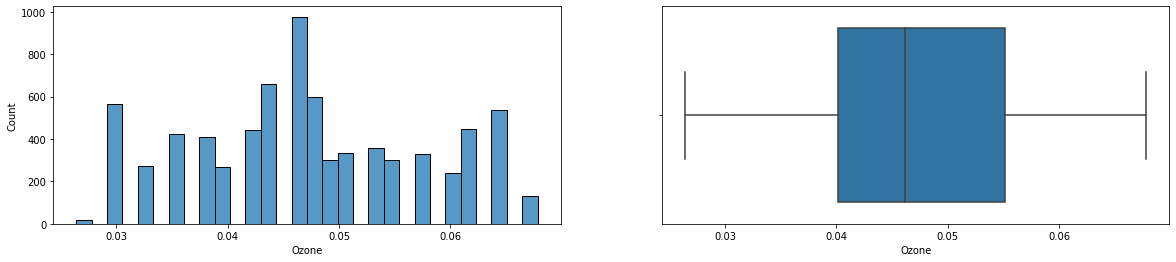

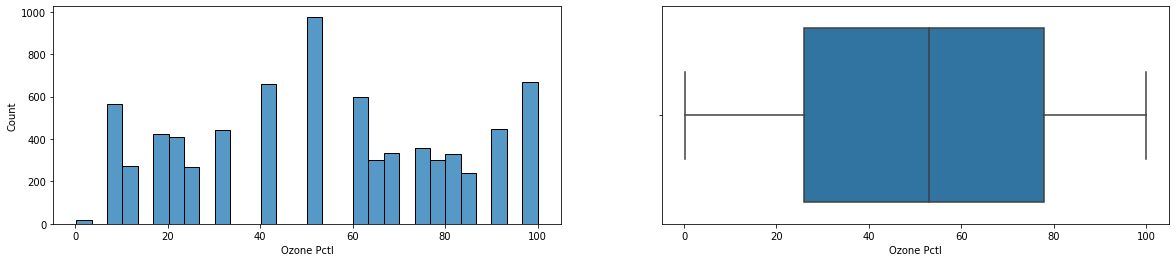

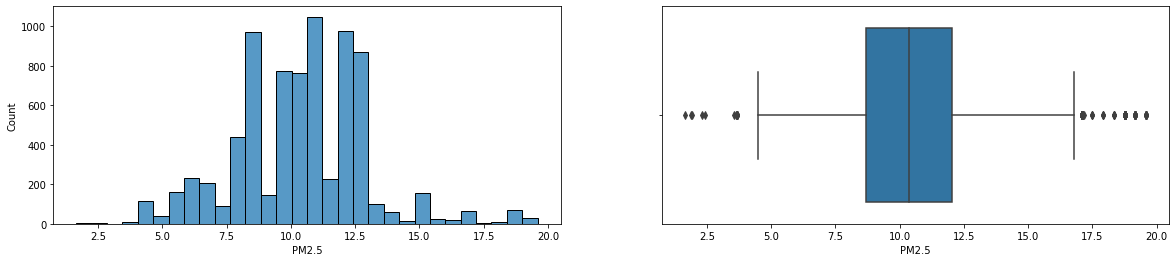

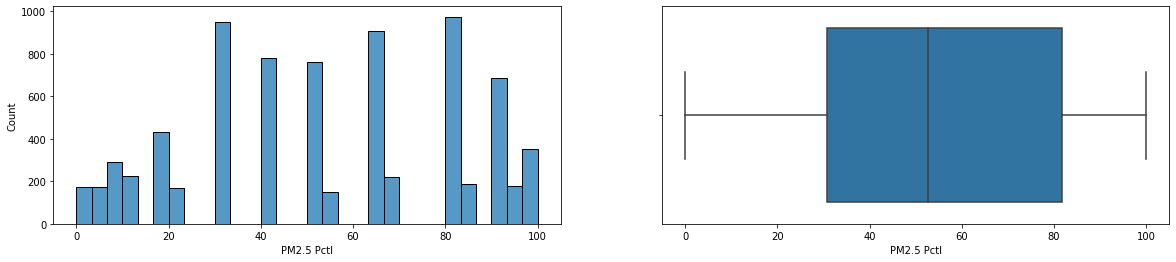

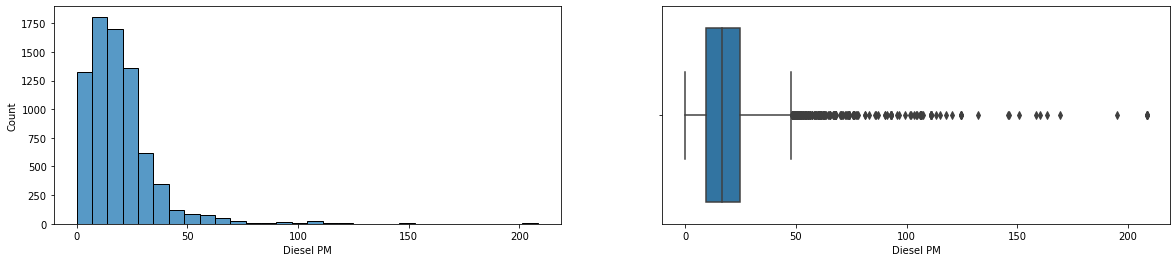

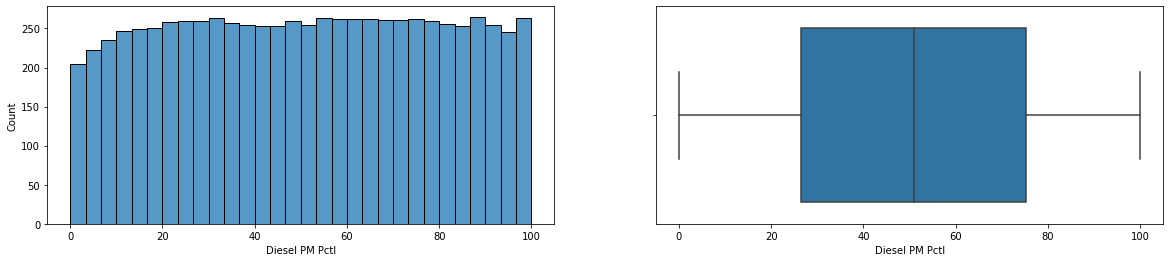

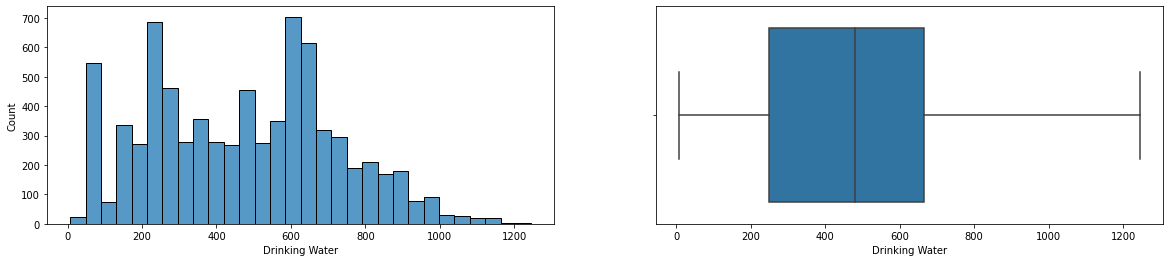

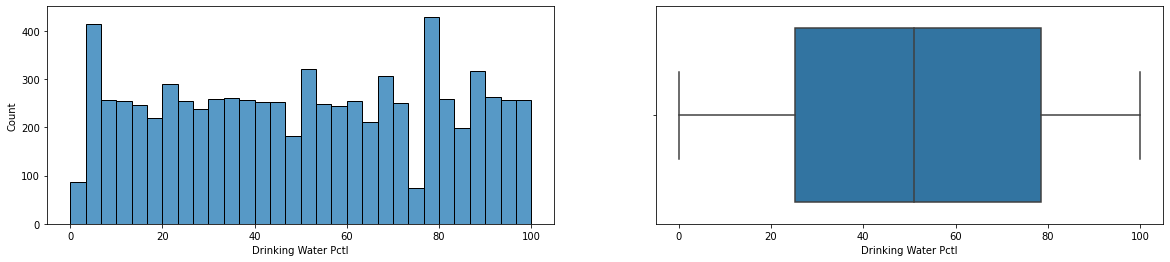

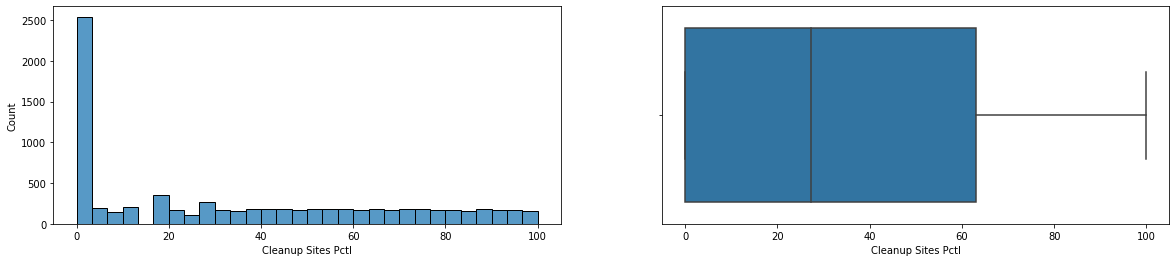

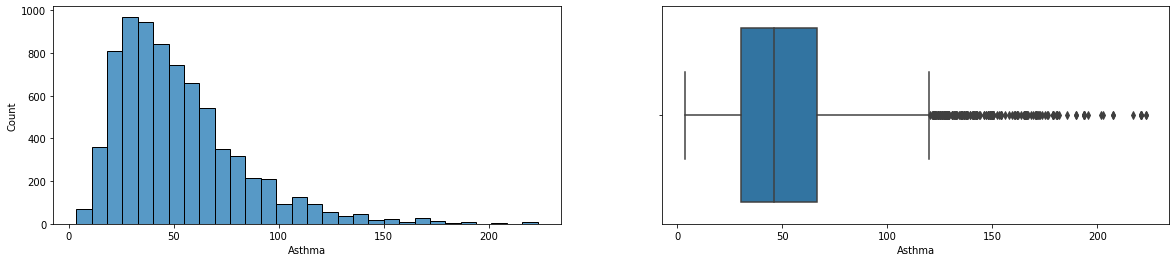

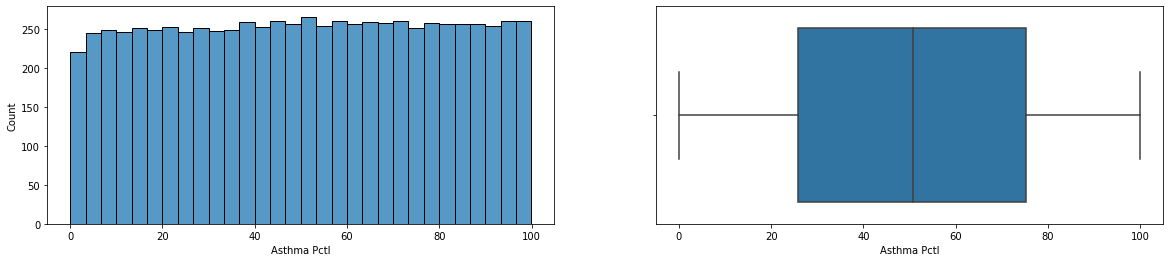

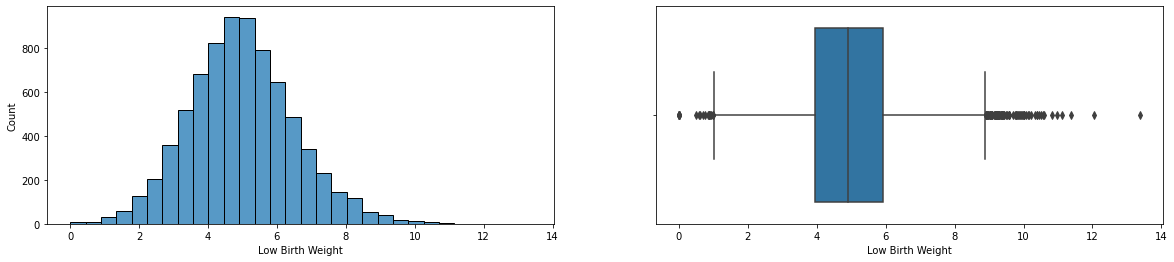

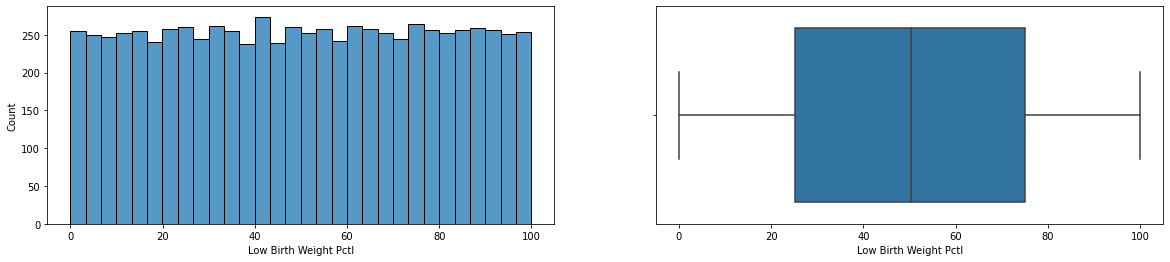

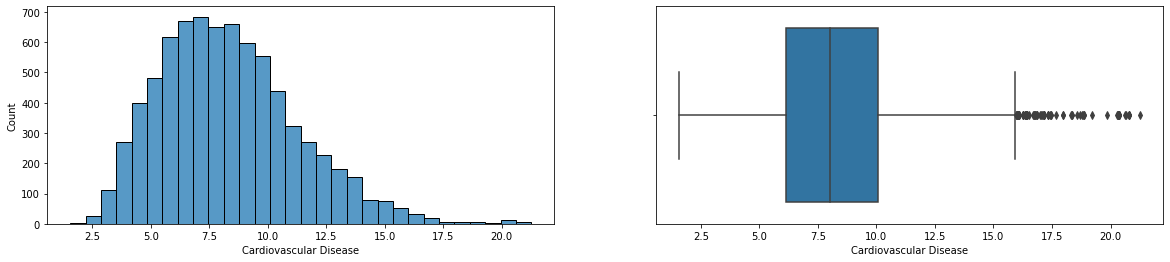

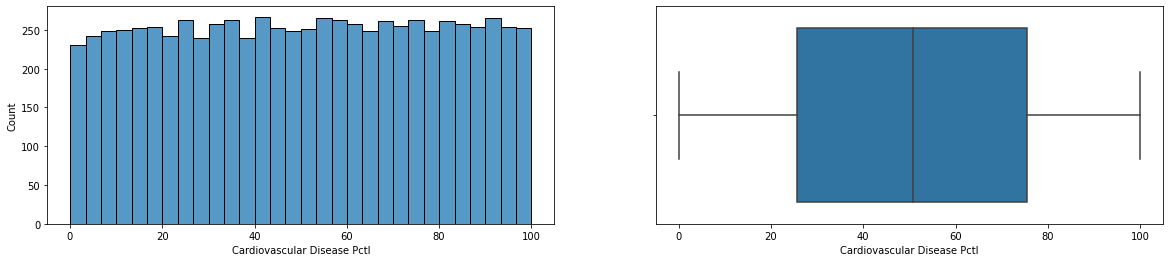

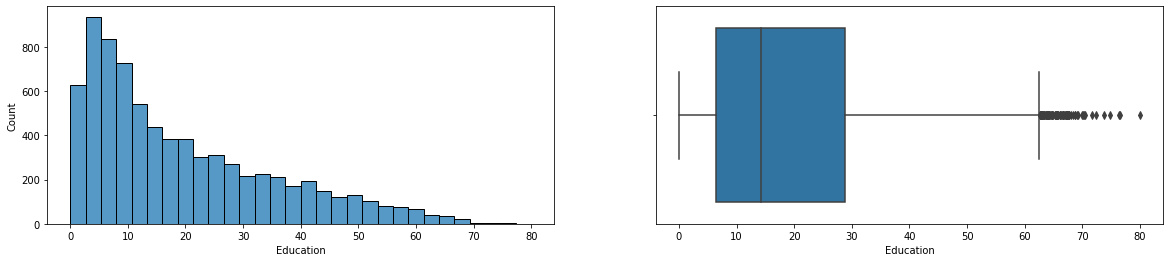

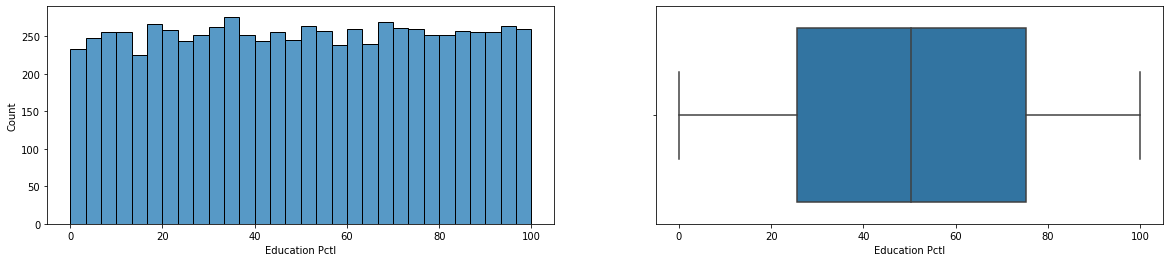

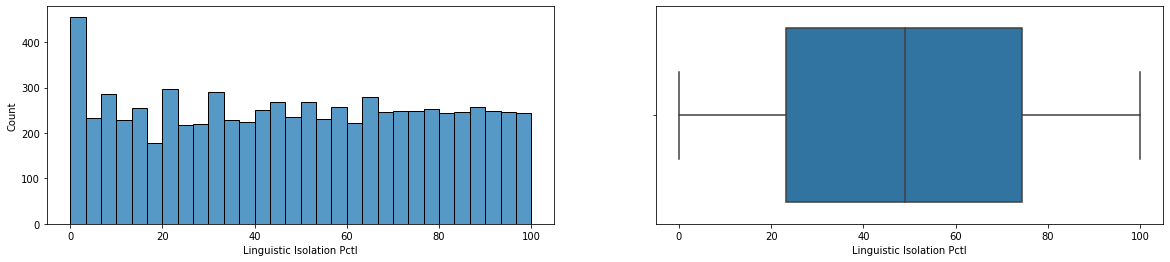

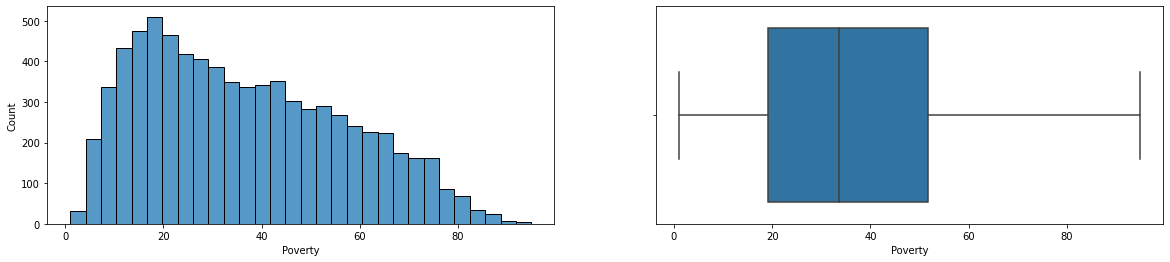

In [ ]:
# Lets look at the distribution of each of the response variable and its relation to the predictor variable. 
numerical = df.select_dtypes('number').columns
for col in numerical:
    fig, ax = plt.subplots(1, 2, figsize=(20,4))
    sns.histplot(data=df, x=col, bins = 30, ax=ax[0])
    #sns.scatterplot(data=df, x=df['Poverty'], y= col, hue=col)#df["Poverty"])
    sns.boxplot(data=df, x=col, ax=ax[1]);

The columns 'Education' and 'Education pctl' are highly correlated with our predictor variable 'Poverty'. We need to make sure that we are handling all the outliers for these columns because outliers may affect our model accuracy.

We did saw the histogram for both the columns "Education" and "Eduation pctl" and we can confirm that "Education pctl" does not have any outliers. However, lets check for "Education" Column further.

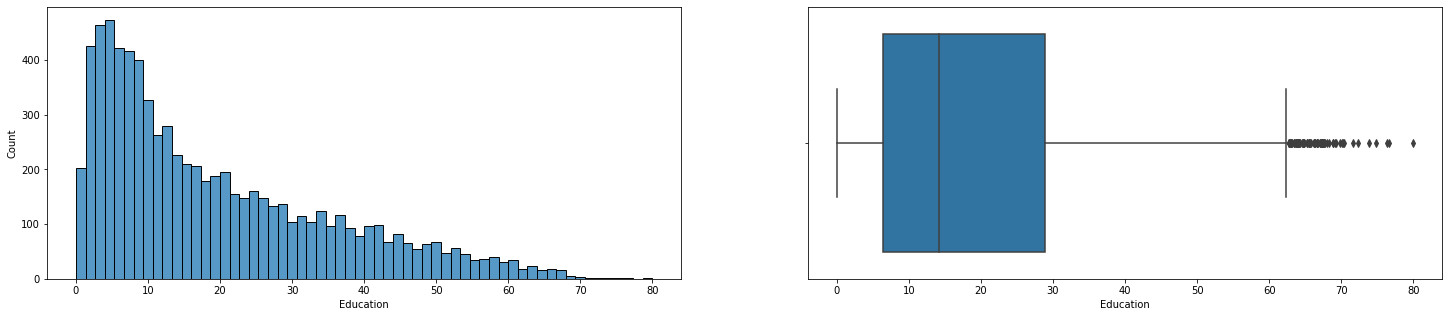

In [ ]:
# df.boxplot(["Education"])
fig, ax = plt.subplots(1, 2, figsize=(25,5))
sns.histplot(data=df, x="Education", bins=60, ax = ax[0])
sns.boxplot(x=df["Education"])

There are some outliers which have values higher than 70. Removing the values above 70.

In [ ]:
# Shape of the data before filtering
df.shape

(7610, 19)

In [ ]:
# filtering the rows having Education column value greater than 70
df = df[df["Education"] <= 70]
df.shape

(7600, 19)

## Preparing Data for Modeling

### Filter/ Analyze Predictor Column

We need to recode the target variable to a 1 if greater than the median value of poverty, otherwise make it a 0. So, this will convert the target variable to categorical column.

In [ ]:
# Inspecting few rows before 
df.head()

,Ozone,Ozone Pctl,PM2.5,PM2.5 Pctl,Diesel PM,Diesel PM Pctl,Drinking Water,Drinking Water Pctl,Cleanup Sites Pctl,Asthma,Asthma Pctl,Low Birth Weight,Low Birth Weight Pctl,Cardiovascular Disease,Cardiovascular Disease Pctl,Education,Education Pctl,Linguistic Isolation Pctl,Poverty
0,0.064889,98.182950,15.40,97.218064,48.523809,95.544493,681.195604,80.915554,98.668369,131.64,97.668620,7.44,93.835704,14.13,96.309687,53.3,95.760787,77.509665,76.3
1,0.062163,91.101431,13.31,93.637725,38.556339,92.121966,904.657603,96.108270,97.683327,60.66,69.779329,7.04,90.849673,12.94,92.656776,53.3,95.760787,96.253833,72.5
2,0.062163,91.101431,15.40,97.218064,47.445208,95.420037,681.195604,80.915554,85.133163,142.12,98.329385,10.16,99.782135,14.96,97.668620,42.3,89.061317,78.389548,86.8
3,0.046178,53.018046,12.54,84.019461,24.117036,73.515868,278.756235,29.113135,96.096315,142.17,98.341853,6.23,80.648469,14.72,97.169929,40.8,87.522079,75.136648,61.3
4,0.064889,98.182950,15.40,97.218064,18.845944,58.220286,1000.240794,98.640389,97.154323,90.48,89.539958,4.50,38.920928,12.82,92.357561,45.1,91.130457,73.723504,66.4


In [ ]:
# Calculate the median poverty
poverty_Median = df['Poverty'].median()
print("Median value of Poverty is :", poverty_Median)

Median value of Poverty is : 33.6


In [ ]:
# Applying the condition to filter the rows by 1 and 0 based on Poverty values
df["Poverty"] = np.where(df["Poverty"] > poverty_Median, 1, 0)

In [ ]:
# Total number of classification in Poverty
df["Poverty"].value_counts()

0    3810
1    3790
Name: Poverty, dtype: int64

In [ ]:
# Inspecting the dataFrame
df.head()

,Ozone,Ozone Pctl,PM2.5,PM2.5 Pctl,Diesel PM,Diesel PM Pctl,Drinking Water,Drinking Water Pctl,Cleanup Sites Pctl,Asthma,Asthma Pctl,Low Birth Weight,Low Birth Weight Pctl,Cardiovascular Disease,Cardiovascular Disease Pctl,Education,Education Pctl,Linguistic Isolation Pctl,Poverty
0,0.064889,98.182950,15.40,97.218064,48.523809,95.544493,681.195604,80.915554,98.668369,131.64,97.668620,7.44,93.835704,14.13,96.309687,53.3,95.760787,77.509665,1
1,0.062163,91.101431,13.31,93.637725,38.556339,92.121966,904.657603,96.108270,97.683327,60.66,69.779329,7.04,90.849673,12.94,92.656776,53.3,95.760787,96.253833,1
2,0.062163,91.101431,15.40,97.218064,47.445208,95.420037,681.195604,80.915554,85.133163,142.12,98.329385,10.16,99.782135,14.96,97.668620,42.3,89.061317,78.389548,1
3,0.046178,53.018046,12.54,84.019461,24.117036,73.515868,278.756235,29.113135,96.096315,142.17,98.341853,6.23,80.648469,14.72,97.169929,40.8,87.522079,75.136648,1
4,0.064889,98.182950,15.40,97.218064,18.845944,58.220286,1000.240794,98.640389,97.154323,90.48,89.539958,4.50,38.920928,12.82,92.357561,45.1,91.130457,73.723504,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7600 entries, 0 to 7928
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Ozone                        7600 non-null   float64
 1   Ozone Pctl                   7600 non-null   float64
 2   PM2.5                        7600 non-null   float64
 3   PM2.5 Pctl                   7600 non-null   float64
 4   Diesel PM                    7600 non-null   float64
 5   Diesel PM Pctl               7600 non-null   float64
 6   Drinking Water               7600 non-null   float64
 7   Drinking Water Pctl          7600 non-null   float64
 8   Cleanup Sites Pctl           7600 non-null   float64
 9   Asthma                       7600 non-null   float64
 10  Asthma Pctl                  7600 non-null   float64
 11  Low Birth Weight             7600 non-null   float64
 12  Low Birth Weight Pctl        7600 non-null   float64
 13  Cardiovascular Dis

### Plots

<Figure size 1080x720 with 0 Axes>

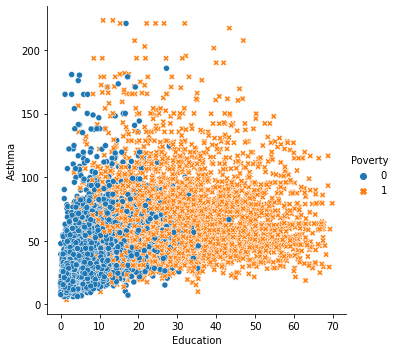

In [ ]:
# Relation between Predictor variable and Education, Asthma
plt.figure(figsize=(15,10))
sns.relplot(
    data=df,
    x="Education", y="Asthma", hue="Poverty", style="Poverty"
)

We can observe that the people with the lower education are classified with the ones below median Poverty level.

Also, Age-adjusted rate of emergency department visits for asthma is lower in case of the people below median poverty level.

<Figure size 1080x720 with 0 Axes>

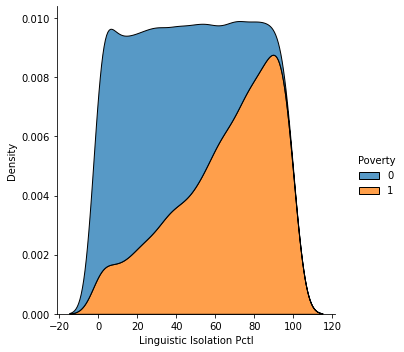

In [ ]:
# Plotting 
plt.figure(figsize=(15,10))
sns.displot(df, x="Linguistic Isolation Pctl", hue="Poverty", kind="kde", multiple="stack")

We see that with higher Linguistic isolation percentile, we have more people that are above median poverty level.

### Splitting the Data in Test and Train Set

In [ ]:
# split into X and Y
Y = df['Poverty']
X = df.drop(['Poverty'], axis=1)

print(X.shape)
print(Y.shape)

(7600, 18)
(7600,)


In [ ]:
# convert to numpy array
X = np.array(X)
y = np.array(Y)

In [ ]:
# splitting Using the module method
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, shuffle = True, random_state = 2994408)

### Scaling the splitted Data

In [ ]:
# use minMax scaler
min_max_scaler = MinMaxScaler()
X_train = min_max_scaler.fit_transform(X_train)
X_test = min_max_scaler.transform(X_test)

## Build, Compile and Fit the Model

### Building the Model

In [ ]:
# building the model using sequential API
model = Sequential()
model.add(Dense(400, input_shape=(X_train.shape[1],), activation='relu')) # (features,)
model.add(Dropout(0.1)) 
model.add(Dense(100, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(50, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1, activation='sigmoid')) # output node
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_20 (Dense)            (None, 400)               7600      
                                                                 
 dropout_15 (Dropout)        (None, 400)               0         
                                                                 
 dense_21 (Dense)            (None, 100)               40100     
                                                                 
 dropout_16 (Dropout)        (None, 100)               0         
                                                                 
 dense_22 (Dense)            (None, 50)                5050      
                                                                 
 dropout_17 (Dropout)        (None, 50)                0         
                                                                 
 dense_23 (Dense)            (None, 1)                

### Compile

In [ ]:
# compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

### Callbacks/ Early Stopping

In [ ]:
# early stopping callback
es = EarlyStopping(monitor='val_accuracy', 
                                   mode='max',
                                   patience=50,
                                   restore_best_weights=True)

### Fit Model

In [ ]:
history = model.fit(X_train,
                    y_train,
                    callbacks=[es],
                    epochs=100000, # you can set this to a big number!
                    batch_size=10,
                    validation_split=0.1,
                    shuffle=True,
                    verbose=1)

Epoch 1/100000
616/616 [==============================] - 4s 5ms/step - loss: 0.3862 - accuracy: 0.8298 - val_loss: 0.3991 - val_accuracy: 0.8333
Epoch 2/100000
616/616 [==============================] - 3s 5ms/step - loss: 0.3449 - accuracy: 0.8496 - val_loss: 0.3302 - val_accuracy: 0.8538
Epoch 3/100000
616/616 [==============================] - 2s 4ms/step - loss: 0.3394 - accuracy: 0.8553 - val_loss: 0.3210 - val_accuracy: 0.8684
Epoch 4/100000
616/616 [==============================] - 2s 3ms/step - loss: 0.3361 - accuracy: 0.8540 - val_loss: 0.3203 - val_accuracy: 0.8713
Epoch 5/100000
616/616 [==============================] - 2s 3ms/step - loss: 0.3362 - accuracy: 0.8572 - val_loss: 0.3209 - val_accuracy: 0.8684
Epoch 6/100000
616/616 [==============================] - 2s 4ms/step - loss: 0.3338 - accuracy: 0.8571 - val_loss: 0.3315 - val_accuracy: 0.8611
Epoch 7/100000
616/616 [==============================] - 2s 3ms/step - loss: 0.3258 - accuracy: 0.8609 - val_loss: 0.3179 -

## Evaluate the Model

### Learning Curve (Loss Vs Epochs)

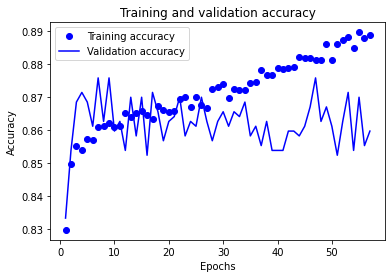

In [ ]:
# learning curve
import matplotlib.pyplot as plt

# accuracy
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

# loss
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, acc, 'bo', label='Training accuracy')
# b is for "solid blue line"
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

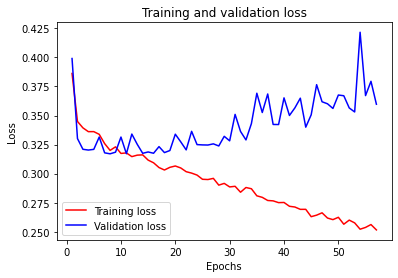

In [ ]:
# learning curve
import matplotlib.pyplot as plt

# loss
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

# "r" is for "solid red line"
plt.plot(epochs, loss, 'r', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

## Bullets on Model



*   Initially, when we consider all the 36 variables/ columns for the predictions, the accuracy was less than 10%. The accuracy was lower even trying with more than 1000 inputs to the hidden layer, and 500 to the next hidden layer. ALthough, larget combinations, We did not any improvements in the model accuracy.
*   Again, to improve the accuracy, we removed the columns that are not correlated with our target variable, and we drill down to 19 columns. So, the number of combinations in the input layer also reduced. We used 400 inputs to cover up all the combinations for those 19 columns. This helped improve the accuracy of the learning curve.
*   Initially, we tried with the patience value of 20, and observe that the model did not got sufficient time to learn or the curve to flatten. So, after increase the patience value to 50, we were able to see the improvement in accuracy.




### Evaluation of Model on Test Dataset

In [ ]:
model.predict(X_test)

array([[3.64537239e-02],
       [8.70718360e-01],
       [8.45673859e-01],
       [9.96115685e-01],
       [6.94641352e-01],
       [9.15763319e-01],
       [9.72534895e-01],
       [4.98999298e-01],
       [1.52873397e-02],
       [4.23364937e-02],
       [9.10230398e-01],
       [9.29463983e-01],
       [9.87132549e-01],
       [9.95395780e-01],
       [1.74190998e-02],
       [8.27303588e-01],
       [4.56643671e-01],
       [8.17702115e-01],
       [9.48619843e-03],
       [9.95883584e-01],
       [6.80242181e-01],
       [2.33384371e-02],
       [9.82057333e-01],
       [4.47196662e-02],
       [1.40187323e-01],
       [5.83866239e-03],
       [9.92910802e-01],
       [2.11310983e-02],
       [9.52184439e-01],
       [2.02578008e-02],
       [9.79215026e-01],
       [8.81975174e-01],
       [9.84784245e-01],
       [9.37826335e-02],
       [1.73217654e-02],
       [1.96712613e-02],
       [1.83526874e-02],
       [2.15650290e-01],
       [9.59798932e-01],
       [9.99074697e-01],


In [ ]:
np.round(model.predict(X_test),0)

array([[0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],

In [ ]:
y_test.shape

(760,)

In [ ]:
X_test.shape

(760, 18)

### Confustion Matrix

In [ ]:
# Importing the libraries
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [ ]:
# Applying the model to test
preds = np.round(model.predict(X_test),0)


In [ ]:
confusion_matrix(y_test, preds)

array([[359,  31],
       [ 53, 317]])

In [ ]:
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.87      0.92      0.90       390
           1       0.91      0.86      0.88       370

    accuracy                           0.89       760
   macro avg       0.89      0.89      0.89       760
weighted avg       0.89      0.89      0.89       760



### Baseline Accuracy

In [ ]:
# Counting the number 0 and 1 in the test dataset
pd.DataFrame(y_train).value_counts() 

0    3420
1    3420
dtype: int64

In [ ]:
# Calculating the baseline accuracy for training data
print("The baseline accuracy for population below Poverty (0) :", (3420/6840))
print("The baseline accuracy for population above Poverty (1) :", (3420/6840))

The baseline accuracy for population below Poverty (0) : 0.5
The baseline accuracy for population above Poverty (1) : 0.5


In [ ]:
# Counting the number 0 and 1 in the test dataset
pd.DataFrame(y_test).value_counts() 

0    390
1    370
dtype: int64

In [ ]:
# Calculating the baseline accuracy for test data
print("The baseline accuracy for population below Poverty (0) :", (390/760))
print("The baseline accuracy for population above Poverty (1) :", (370/760))

The baseline accuracy for population below Poverty (0) : 0.5131578947368421
The baseline accuracy for population above Poverty (1) : 0.4868421052631579


### Bullet Points on Predictions



*   The model performed well above the baseline accuracy i.e. 50%. 
*   The model prediction are having accuracy more than 85% which indicates that our model is 85% confident with the predictions. 

